# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'AIS first 2000.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Parse the timestamp column to datetime
df['# Timestamp'] = pd.to_datetime(df['# Timestamp'], errors='coerce')

# Drop columns with more than 90% missing values
threshold = 0.9 * len(df)
columns_to_drop = [col for col in df.columns if df[col].isnull().sum() > threshold]
df_cleaned = df.drop(columns=columns_to_drop)

# Display initial information
print(f"Initial number of features: {df.shape[1]}")
print(f"Remaining features after dropping: {df_cleaned.shape[1]}")
print(f"Dropped columns: {columns_to_drop}")

Initial number of features: 26
Remaining features after dropping: 16
Dropped columns: ['Name', 'Cargo type', 'Width', 'Length', 'Draught', 'ETA', 'A', 'B', 'C', 'D']


## 1. Dataset Overview
### Summary of Dataset Structure


In [3]:
print(f"Number of samples: {df_cleaned.shape[0]}")
print(f"Number of features: {df_cleaned.shape[1]}")
print("\nFirst few rows:")
print(df_cleaned.head())
print("\nData types:")
print(df_cleaned.dtypes)


Number of samples: 2000
Number of features: 16

First few rows:
  # Timestamp Type of mobile       MMSI   Latitude  Longitude  \
0  2024-02-09        Class A  219005068  55.171433  11.160200   
1  2024-02-09        Class A  219005941  56.231367  11.888337   
2  2024-02-09        Class A  245535000  57.005742  10.164888   
3  2024-02-09   Base Station    2190047  55.697250  12.613717   
4  2024-02-09        Class A  219017815  55.965932  11.844703   

      Navigational status  ROT   SOG    COG  Heading      IMO Callsign  \
0  Under way using engine  0.0   0.0    NaN     18.0  Unknown  Unknown   
1      Engaged in fishing  0.0   2.6  301.4    300.0  Unknown  Unknown   
2  Under way using engine  0.0  10.1  317.9    318.0  Unknown  Unknown   
3           Unknown value  NaN   NaN    NaN      NaN  Unknown  Unknown   
4  Under way using engine  0.0   0.0   67.7    246.0  Unknown  Unknown   

   Ship type Type of position fixing device Destination Data source type  
0  Undefined             

## 2. Handling Missing Values

### Check for Missing Values

In [4]:
missing_values = df_cleaned.isnull().sum()
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': (missing_values / len(df_cleaned)) * 100
})
print("Missing Values Summary:")
print(missing_summary[missing_summary['Missing Values'] > 0])

Missing Values Summary:
         Missing Values  Percentage
ROT                 633       31.65
SOG                 312       15.60
COG                 419       20.95
Heading             538       26.90


## 3. Feature Distributions

### Visualize Distributions of Numerical Features

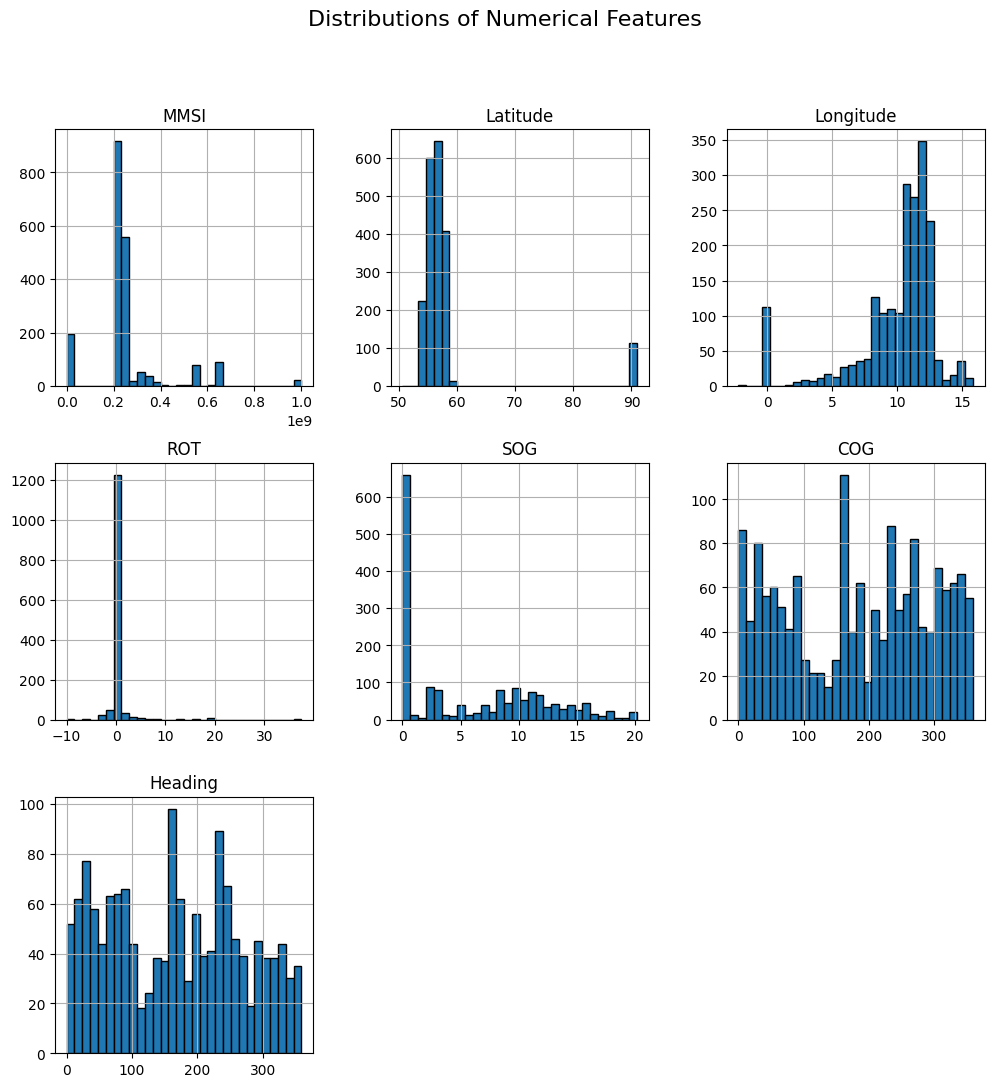

In [5]:
numeric_cols = df_cleaned.select_dtypes(include='number').columns
df_cleaned[numeric_cols].hist(figsize=(12, 12), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()

## 4. Possible Biases

### Class Distribution for Categorical Variables

/tmp/ipykernel_16546/1452103410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y=col, palette='coolwarm')


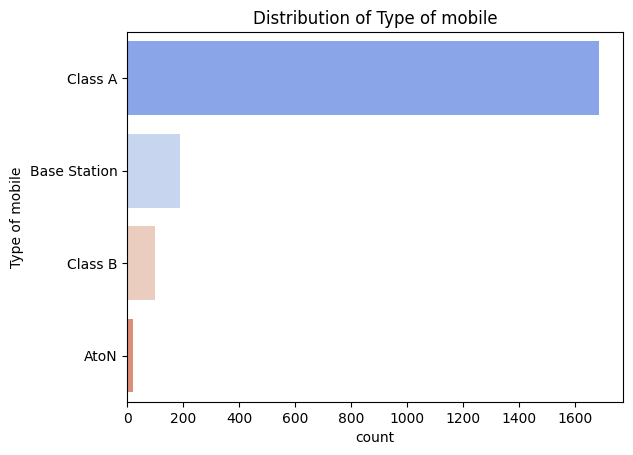

/tmp/ipykernel_16546/1452103410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y=col, palette='coolwarm')


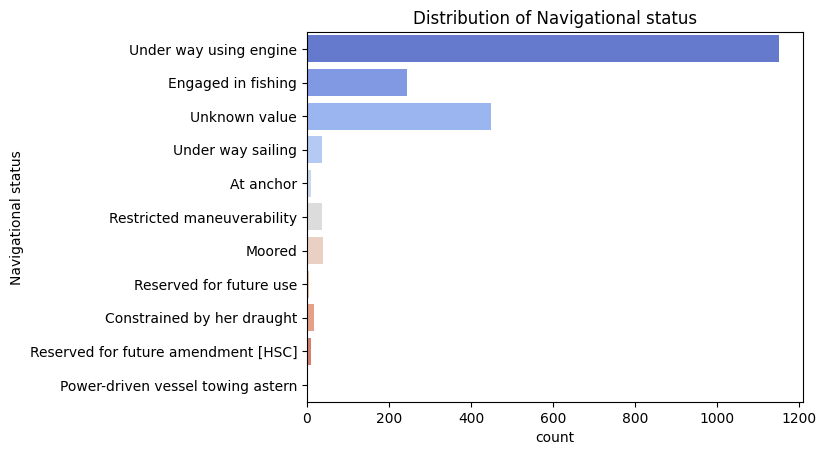

/tmp/ipykernel_16546/1452103410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y=col, palette='coolwarm')


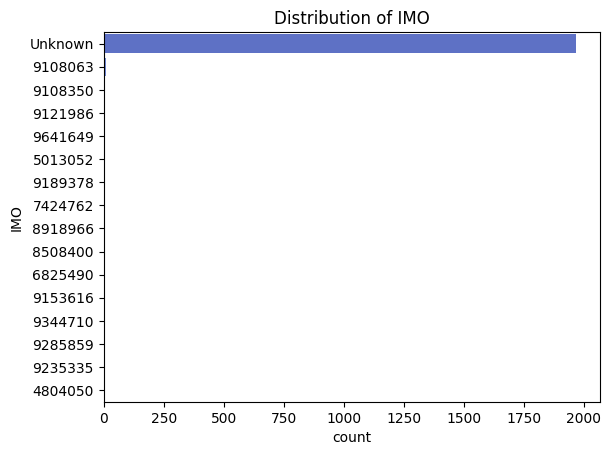

/tmp/ipykernel_16546/1452103410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y=col, palette='coolwarm')


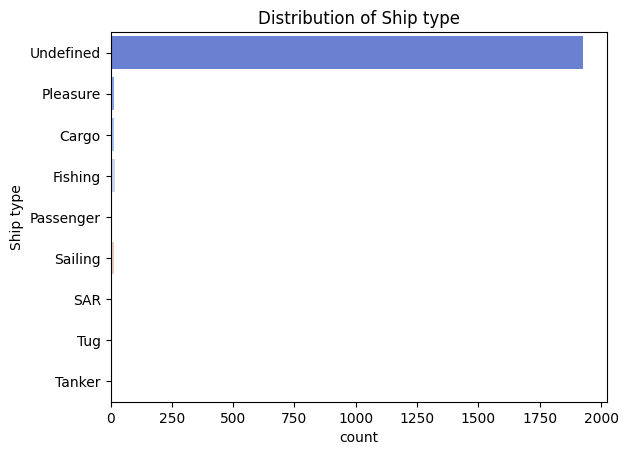

/tmp/ipykernel_16546/1452103410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y=col, palette='coolwarm')


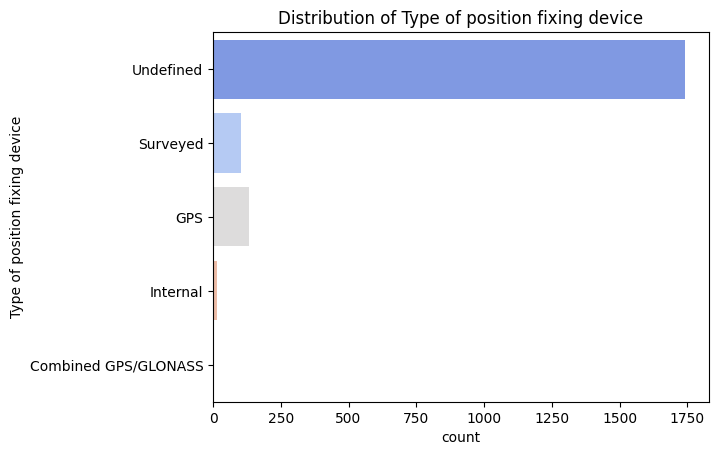

/tmp/ipykernel_16546/1452103410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y=col, palette='coolwarm')


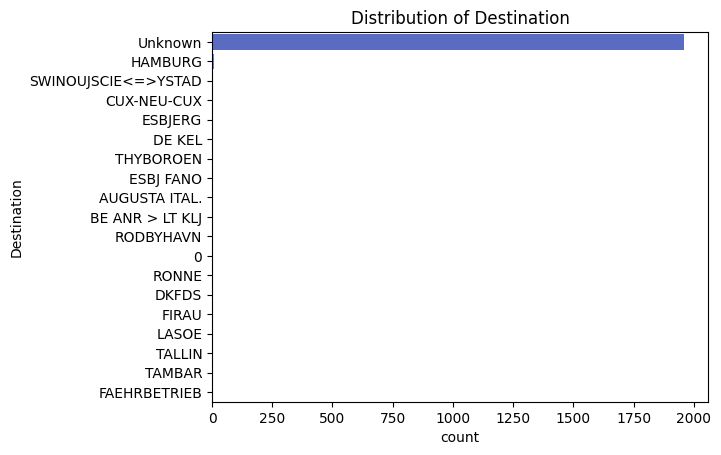

/tmp/ipykernel_16546/1452103410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y=col, palette='coolwarm')


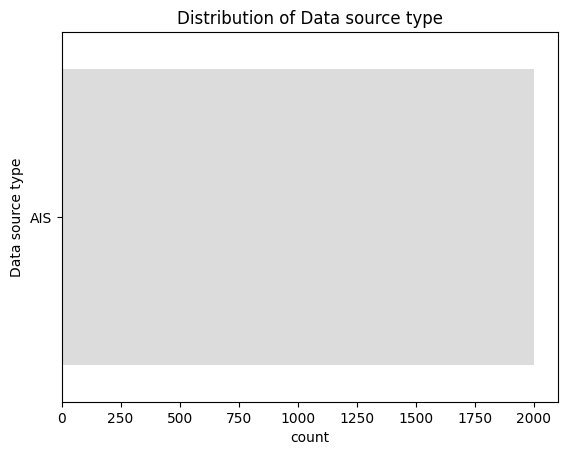

In [6]:
categorical_cols = df_cleaned.select_dtypes(include='object').columns
for col in categorical_cols:
    if df_cleaned[col].nunique() < 20:  # Focus on categorical features with fewer categories
        sns.countplot(data=df_cleaned, y=col, palette='coolwarm')
        plt.title(f"Distribution of {col}")
        plt.show()

## 5. Correlations

### Correlation Heatmap for Numerical Features

In [7]:
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Class A'